<a href="https://colab.research.google.com/github/TamaraMaggioni/DiploDatos2021/blob/main/IntroAprendizajeAutomatico/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)  #SE AGREGA BALANCEO/ESTRATIFICACIÓN PARA TENER 20% DE Y=1 EN AMBOS DATASET

Utilizamos el código provisto en el Lab2, pero modificamos la función para que la división entre X_Train y X_Test contenga etiquetas Y balanceadas con el conjunto original (16% de y=1):

In [ ]:
print('% y=1 en dataset:', "{0:.2%}".format(sum(dataset.TARGET==1) / len(dataset)))
print('% y=1 en train:', "{0:.2%}".format(sum(y_train == 1) / len(y_train)))
print('% y=1 en test:', "{0:.2%}".format(sum(y_test == 1) / len(y_test)))

% y=1 en dataset: 16.67%
% y=1 en train: 16.66%
% y=1 en test: 16.71%



Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

In [ ]:
dataset.head()

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106


In [ ]:
print(dataset['TARGET'].unique())
print(dataset['TARGET'].value_counts())

[0 1]
0    1545
1     309
Name: TARGET, dtype: int64


In [ ]:
print('Porcentaje de personas que no lograron devolver sus creditos =', round((309/1545)*100),'%')

Porcentaje de personas que no lograron devolver sus creditos = 20 %


1. El conjunto de datos pertenece al departamento de credito de un banco que desea automatizar la decision de aprobar o no lineas de creditos a futuros clientes. Contiene 5960 casos de personas que recibieron lineas de creditos para adquisicion de viviendas (las filas) y 11 columnas descriptivas de cada uno de dichos casos, incluida la performance de la devolucion del credito otorgado.
2. La variable a entrenar y predecir es el TARGET, que indica si la persona efectivamente devolvio el credito (indicado con valor == 0) o no (indicado con valor == 1). Esta ultima situacion incluye tanto casos en los que la persona no logro pagar como en los que cometio un acto delictivo.
3. Los atributos para realizar la prediccion incluyen:
- LOAN: la cantiad de dinero solicitado
- MORTDUE: la cantidad de dinero que la persona debe, o monto adeudado, de la hipoteca existente
- VALUE: el valor de la propiedad hipotecada
- YOG: cantidad de años en los que la persona se encuentra en su actual trabajo
- DEROG: cantidad de reportes o informes despectivos de relevancia
- DELINQ: cantidad de lineas de credito morosas
- CLAGE: antiguedad o cantidad de años de la linea comercial mas antigua en meses
- NINQ: cantidad de lineas de credito recientes
- CLNO: cantidad de lineas de credito totales
- DEBTINC: proporcion entre la deuda y el ingreso de la persona
4. Probablemente, las variables que más capacidad de prediccion sobre la posibilidad de pago de la dueda esten relacionadas al historial de pago de la persona. En este caso, esperaría que DEROG y DELINQ me den mucha informacion. 

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Always scale the input. The most convenient way is to use a pipeline.
clf = make_pipeline(StandardScaler(), 
                    SGDClassifier(random_state = 42))
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=42,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
#Predecimos
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

Métricas en conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1236
           1       0.68      0.30      0.42       247

    accuracy                           0.86      1483
   macro avg       0.78      0.64      0.67      1483
weighted avg       0.84      0.86      0.84      1483

Métricas en conjunto de test:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       309
           1       0.89      0.27      0.42        62

    accuracy                           0.87       371
   macro avg       0.88      0.63      0.67       371
weighted avg       0.88      0.87      0.84       371



Text(0.5, 1.0, 'Matriz de confusión \n Datos TEST')

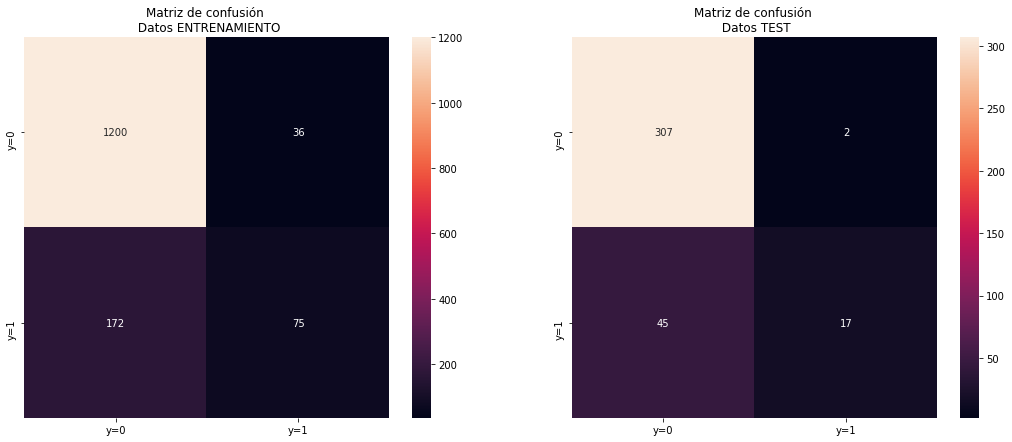

In [ ]:
#Calculamos la performance:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
print('Métricas en conjunto de entrenamiento:')
print(classification_report(y_train, y_train_pred))
cm = confusion_matrix(y_train, y_train_pred)

df_cm_train = pd.DataFrame(cm, index = ['y=0','y=1'],
                  columns = ['y=0','y=1'])


print('Métricas en conjunto de test:')
print(classification_report(y_test, y_test_pred))
cm2 = confusion_matrix(y_test, y_test_pred)

df_cm_test = pd.DataFrame(cm2, index = ['y=0','y=1'],
                  columns = ['y=0','y=1'])
fig, axes = plt.subplots(1,2,figsize = (18,7))
sns.heatmap(df_cm_train, annot=True, fmt='g', ax=axes[0])
sns.heatmap(df_cm_test, annot=True, fmt='g', ax=axes[1])
axes[0].set_title('Matriz de confusión \n Datos ENTRENAMIENTO')
axes[1].set_title('Matriz de confusión \n Datos TEST')

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = make_pipeline(StandardScaler(), 
                    SGDClassifier(eta0=0.00001, random_state = 42))
clf.fit(X_train, y_train)
param_grid = {
    'sgdclassifier__loss': ['hinge', 'log', 'perceptron'],
    'sgdclassifier__learning_rate': ['constant', 'optimal','invscaling'],
    'sgdclassifier__alpha': [0.00001, 0.0001, 0.001],
}
cv = GridSearchCV(clf, param_grid, scoring='accuracy', cv=5)
cv.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('sgdclassifier',
                                        SGDClassifier(alpha=0.0001,
                                                      average=False,
                                                      class_weight=None,
                                                      early_stopping=False,
                                                      epsilon=0.1, eta0=1e-05,
                                                      fit_intercept=True,
                                                      l1_ratio=0.15,
                                                      learning_rate='optimal',
        

In [ ]:
results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']
df = pd.DataFrame(results)
df[['param_sgdclassifier__loss', 'param_sgdclassifier__alpha', 'param_sgdclassifier__learning_rate',  'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(['param_sgdclassifier__loss','param_sgdclassifier__alpha','param_sgdclassifier__learning_rate'])
# print("crit.\tdepth\t| mean\tstd\trank")
# for p, m, s, r in zip(params, mean, std, rank):
#     print(f"{p['criterion']}\t{p['max_depth']}\t| {m:0.2f}\t{s:0.2f}\t{r}")


,param_sgdclassifier__loss,param_sgdclassifier__alpha,param_sgdclassifier__learning_rate,mean_test_score,std_test_score,rank_test_score
0,hinge,1e-05,constant,0.858397,0.007652,12
6,hinge,1e-05,invscaling,0.863111,0.018850,6
3,hinge,1e-05,optimal,0.815256,0.032380,22
9,hinge,0.0001,constant,0.858397,0.007652,12
15,hinge,0.0001,invscaling,0.863111,0.018850,6
12,hinge,0.0001,optimal,0.853019,0.018260,15
18,hinge,0.001,constant,0.858397,0.007652,12
24,hinge,0.001,invscaling,0.863111,0.018850,6
21,hinge,0.001,optimal,0.869870,0.009532,2
1,log,1e-05,constant,0.865131,0.017144,3


El mejor modelo tiene función de loss=log, un alpha de 0.001, y una tasa de aprendizaje tipo "optimal": (eta = 1.0 / (alpha * (t + t0)))

Métricas en conjunto de entrenamiento (mejor modelo):
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1236
           1       0.80      0.30      0.44       247

    accuracy                           0.87      1483
   macro avg       0.84      0.64      0.68      1483
weighted avg       0.86      0.87      0.85      1483

Métricas en conjunto de test (mejor modelo):
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       309
           1       0.88      0.34      0.49        62

    accuracy                           0.88       371
   macro avg       0.88      0.66      0.71       371
weighted avg       0.88      0.88      0.86       371



Text(0.5, 1.0, 'Matriz de confusión \n Datos TEST (mejor modelo)')

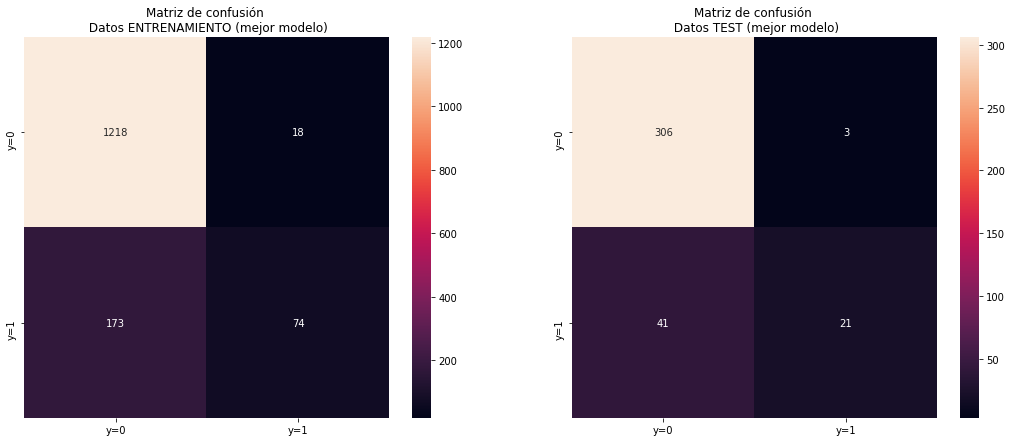

In [ ]:
best_model = cv.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print('Métricas en conjunto de entrenamiento (mejor modelo):')
print(classification_report(y_train, y_train_pred))
cm = confusion_matrix(y_train, y_train_pred)

df_cm_train = pd.DataFrame(cm, index = ['y=0','y=1'],
                  columns = ['y=0','y=1'])


print('Métricas en conjunto de test (mejor modelo):')
print(classification_report(y_test, y_test_pred))
cm2 = confusion_matrix(y_test, y_test_pred)

df_cm_test = pd.DataFrame(cm2, index = ['y=0','y=1'],
                  columns = ['y=0','y=1'])
fig, axes = plt.subplots(1,2,figsize = (18,7))
sns.heatmap(df_cm_train, annot=True, fmt='g', ax=axes[0])
sns.heatmap(df_cm_test, annot=True, fmt='g', ax=axes[1])
axes[0].set_title('Matriz de confusión \n Datos ENTRENAMIENTO (mejor modelo)')
axes[1].set_title('Matriz de confusión \n Datos TEST (mejor modelo)')

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [ ]:
#Como estan compuestos nuestros datos de entrenamiento y test:

print('Dimensiones del set de entrenamiento', X_train.shape, y_train.shape)
print('Dimensiones del set de testing', X_test.shape, y_test.shape)

Dimensiones del set de entrenamiento (1483, 10) (1483,)
Dimensiones del set de testing (371, 10) (371,)


In [ ]:
#Importamos la libreria y creamos un objeto con el tipo de modelo que queremos entrenar

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42) #Ajustamos un valor (la semilla) para poder luego replicar los resultados

In [ ]:
#Entrenamos nuestro modelo utilizando los datos de entrenamiento: X_train, y_train

clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
# Predecimos la variable TARGET (y_train_pred) utilizando nuestros datos de entrenamiento

y_train_pred = clf.predict(X_train)
print(y_train.values)
print(y_train_pred)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [ ]:
# Predecimos sobre los datos de test

y_test_pred = clf.predict(X_test)

In [ ]:
print('Real      : ', y_test[:5].values)
print('Prediccion: ', y_test_pred[:5])

Real      :  [0 0 1 0 0]
Prediccion:  [0 0 1 0 0]


In [ ]:
print(y_test_pred.shape)
print(y_test.shape)

(371,)
(371,)


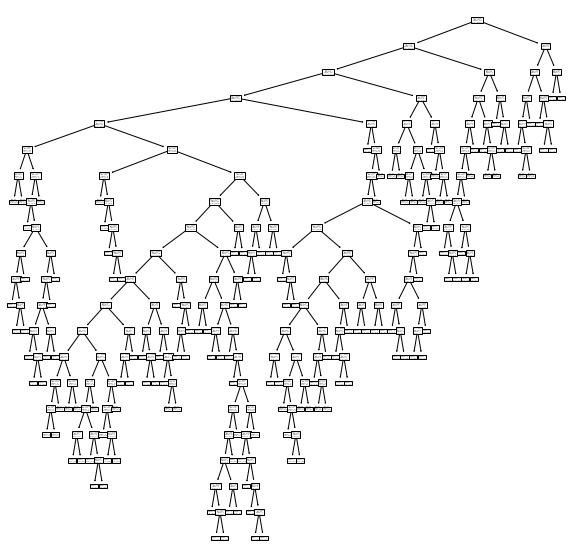

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(clf);


[[1236    0]
 [   0  247]]
[[290  19]
 [ 28  34]]


Text(0.5, 1.0, 'Set de test')

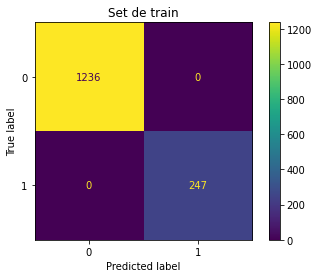

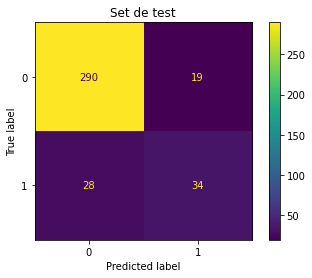

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_train, y_train_pred))

plot_confusion_matrix(clf, X_train, y_train, values_format = '.0f')
plt.title("Set de train")

print(confusion_matrix(y_test, y_test_pred))
plot_confusion_matrix(clf, X_test, y_test, values_format = '.0f')
plt.title("Set de test")

En estas matrices de confusion podemos ver que los datos de train se ajustan exactamente a los datos. Sin embargo, para nuestros datos de test existen categorias mal predichas (28 predecidas como 0, pero que resultaron ser 1 en nuestros datos reales de test y 19 predichas como 1, pero que resultaron ser 0 en nuestros datos reales de test). Por lo tanto, este modelo esta overfitteando. 

In [ ]:
# Cuan bueno es nuestro modelo? vamos a evaluarlo con las distintas metricas

from sklearn.metrics import classification_report

labels = ['pago_deuda_no','pago_deuda_si']

print('Set Train', classification_report(y_train, y_train_pred, target_names=labels))
print('Set Test',classification_report(y_test, y_test_pred, target_names=labels))

Set Train                precision    recall  f1-score   support

pago_deuda_no       1.00      1.00      1.00      1236
pago_deuda_si       1.00      1.00      1.00       247

     accuracy                           1.00      1483
    macro avg       1.00      1.00      1.00      1483
 weighted avg       1.00      1.00      1.00      1483

Set Test                precision    recall  f1-score   support

pago_deuda_no       0.91      0.94      0.93       309
pago_deuda_si       0.64      0.55      0.59        62

     accuracy                           0.87       371
    macro avg       0.78      0.74      0.76       371
 weighted avg       0.87      0.87      0.87       371



In [ ]:
from sklearn.metrics import roc_auc_score #Le agregamos una curva ROC

roc_auc_score_train = roc_auc_score(y_train, y_train_pred)
roc_auc_score_test = roc_auc_score(y_test, y_test_pred)

print(f'Métrica roc_auc_score en Train: {roc_auc_score_train}')
print(f'Métrica roc_auc_score en Test: {roc_auc_score_test}')

Métrica roc_auc_score en Train: 1.0
Métrica roc_auc_score en Test: 0.7434492118175174


Text(0.5, 1.0, 'Set de Test')

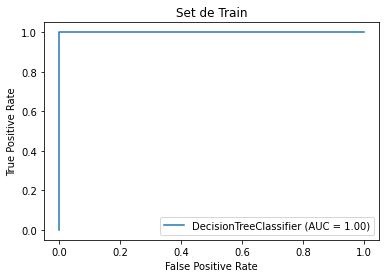

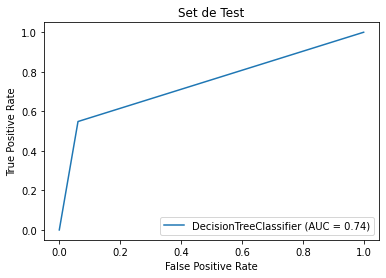

In [ ]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf, X_train, y_train)  
plt.title('Set de Train')

plot_roc_curve(clf, X_test, y_test)  
plt.title('Set de Test')

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
params = { 
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10, 15, 20],
    'min_samples_leaf': [2, 5, 10, 15, 20]
} #Seleccionamos los hiperparametros a evaluar para elegir mejor modelo

tree = DecisionTreeClassifier (random_state = 42) # Creamos objeto con el modelo a aplicar y seteamos la semilla
tree_clf = GridSearchCV (tree, params, cv = 5, scoring = 'accuracy') # Aplicamos el GridSearch y el 5-fold cross validation

tree_clf.fit (X_train, y_train) # Entrenamos en el set de entrenamiento


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [ ]:
results = tree_clf.cv_results_ # Obtenemos los resultados del GridSearchCV sobre nuestros datos entrenados
params = results['params'] # Obtenemos los parametros utilizados
mean = results['mean_test_score'] # Obtenemos el promedio de accuracy
std = results['std_test_score'] # Obtenemos la varianza
rank = results['rank_test_score'] # Obtenemos una lista con las posiciones en un ranking de cada configuracion
df = pd.DataFrame(results) # Creamos un dataframe con los resultados
df[['param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(['rank_test_score']).head() # Pedimos que nos muestre los resultados de acuerdo al puesto en el ranking

,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
35,entropy,10,2,0.878626,0.007658,1
30,entropy,5,2,0.876590,0.015574,2
5,gini,5,2,0.875933,0.009784,3
7,gini,5,10,0.875933,0.012985,3
31,entropy,5,5,0.875915,0.015841,5


##**Mejor modelo**: criterio entropia, con un max_depth 10 y un min_samples_leaf de 2.

In [ ]:
best_tree_clf = tree_clf.best_estimator_ # Obtenemos el objeto del mejor modelo con la combinacion de los mejores parametros
print(best_tree_clf)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


In [ ]:
#Evaluamos nuestro mejor modelo en nuestros sets de train y de test:

labels = ['pago_deuda_no','pago_deuda_si']

print('Set train', classification_report(y_train, best_tree_clf.predict(X_train), target_names=labels)) # Obtenemos las metricas en los datos de entrenamiento, con le mejor modelo
print('Set test', classification_report(y_test, best_tree_clf.predict(X_test), target_names=labels)) # Obtenemos las metricas en los datos de test, con el mejor modelo

Set train                precision    recall  f1-score   support

pago_deuda_no       0.94      0.99      0.97      1236
pago_deuda_si       0.94      0.71      0.81       247

     accuracy                           0.94      1483
    macro avg       0.94      0.85      0.89      1483
 weighted avg       0.94      0.94      0.94      1483

Set test                precision    recall  f1-score   support

pago_deuda_no       0.91      0.96      0.93       309
pago_deuda_si       0.73      0.52      0.60        62

     accuracy                           0.89       371
    macro avg       0.82      0.74      0.77       371
 weighted avg       0.88      0.89      0.88       371



Text(0.5, 1.0, 'Set de test')

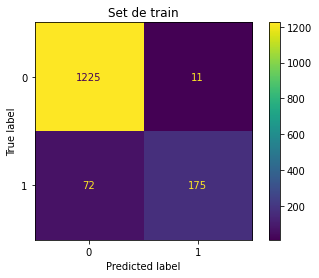

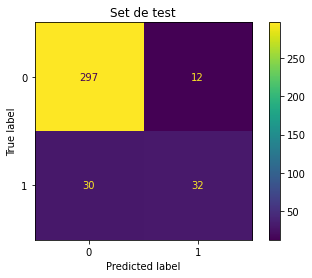

In [ ]:
# Obtenemos nuestras matrices de confusion para nuestros datos de train y de test:

plot_confusion_matrix(best_tree_clf, X_train, y_train, values_format = '.0f')
plt.title("Set de train")

plot_confusion_matrix(best_tree_clf, X_test, y_test, values_format = '.0f')
plt.title("Set de test")

Podemos ver que nuestro modelo mejoró, de acuerdo al accuracy, en relación al modelo realizado en el punto anterior, previniendo así el overfitting. El accuracy del set de train disminuyó de 1 a 0.94, mientras que el accuracy del set de test ascendió de 0.87 a 0.89.

Text(0.5, 1.0, 'Set de Test')

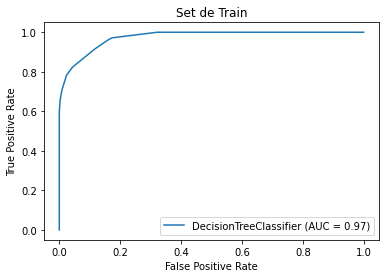

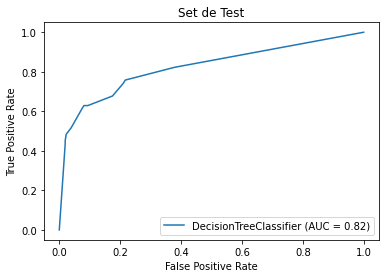

In [ ]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(best_tree_clf, X_train, y_train)  
plt.title('Set de Train')

plot_roc_curve(best_tree_clf, X_test, y_test)  
plt.title('Set de Test')